In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Understanding

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/test.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Ukuran data
print(f"Jumlah baris dan kolom (Train): {train.shape}")
print(f"Jumlah baris dan kolom (Test) : {test.shape}")

Jumlah baris dan kolom (Train): (1460, 81)
Jumlah baris dan kolom (Test) : (1459, 80)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Fitur Numerik:")
print(numeric_features)


categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print("\nFitur Kategorikal:")
print(categorical_features)

print(f"\nJumlah fitur numerik: {len(numeric_features)}")
print(f"Jumlah fitur kategorikal: {len(categorical_features)}")

Fitur Numerik:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Fitur Kategorikal:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 

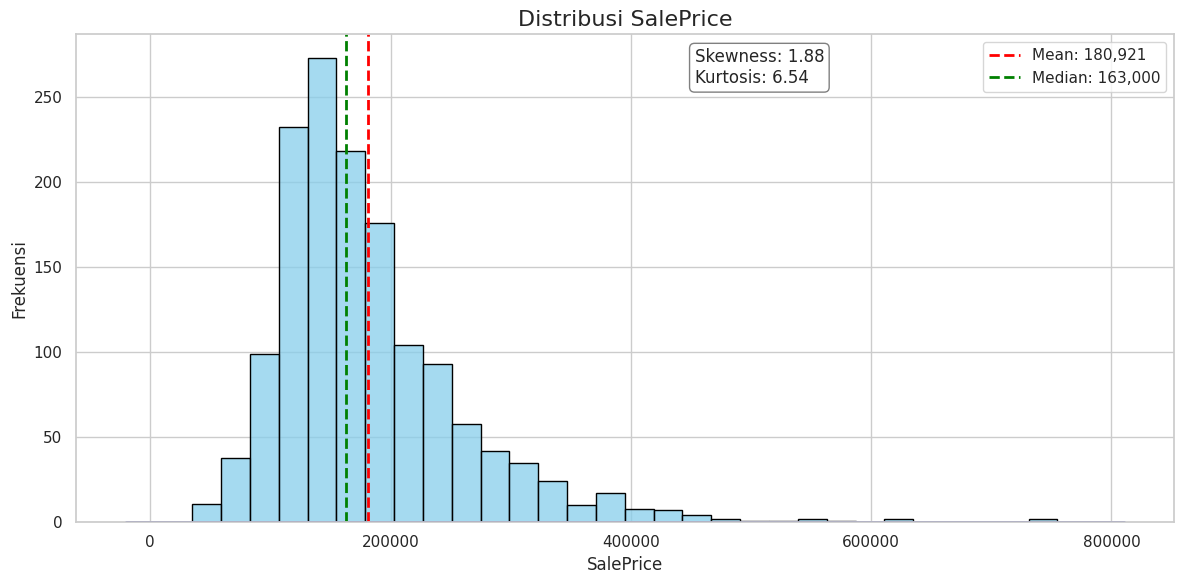

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Hitung statistik dasar
mean_price = train['SalePrice'].mean()
median_price = train['SalePrice'].median()
skewness = train['SalePrice'].skew()
kurtosis = train['SalePrice'].kurt()

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], kde=False, bins=30, color='skyblue', edgecolor='black')
sns.kdeplot(train['SalePrice'], color='darkblue', linewidth=2)

# Tambahkan garis mean dan median
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:,.0f}')

# Anotasi Skewness dan Kurtosis
plt.text(x=train['SalePrice'].max()*0.6, y=plt.gca().get_ylim()[1]*0.9,
         s=f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
         fontsize=12, bbox=dict(boxstyle="round", fc="w", ec="gray"))

# Tambahan estetika
plt.title("Distribusi SalePrice", fontsize=16)
plt.xlabel("SalePrice")
plt.ylabel("Frekuensi")
plt.legend()
plt.tight_layout()
plt.show()

## Interpretasi Distribusi SalePrice

1. **Distribusi Tidak Normal (Right-Skewed)**
   - Grafik menunjukkan distribusi `SalePrice` condong ke kanan (right-skewed), dengan **Skewness = 1.88**.
   - Artinya: Terdapat **banyak rumah dengan harga lebih rendah**, dan **sedikit rumah dengan harga sangat tinggi**, yang menyebabkan ekor memanjang di sisi kanan grafik.

2. **Pusat Distribusi**
   - **Mean (Rata-rata)**: 180,921  
   - **Median (Tengah Data)**: 163,000  
   - Karena **mean > median**, ini menegaskan skewness positif: beberapa outlier dengan harga tinggi menaikkan nilai rata-rata.

3. **Kurtosis Tinggi = 6.54**
   - Nilai kurtosis yang tinggi menunjukkan distribusi **berpuncak tajam** (leptokurtic) dan memiliki **ekor lebih panjang** dari distribusi normal.
   - Artinya: Terdapat kemungkinan **outlier signifikan** dalam data `SalePrice`.

4. **Implikasi terhadap Model**
   - Distribusi `SalePrice` yang tidak normal dapat memengaruhi performa model regresi, terutama model yang mengasumsikan normalitas (misalnya Linear Regression).
   - Solusi umum: melakukan **transformasi logaritmik (log)** terhadap `SalePrice` untuk membuat distribusinya lebih simetris dan stabil secara statistik.

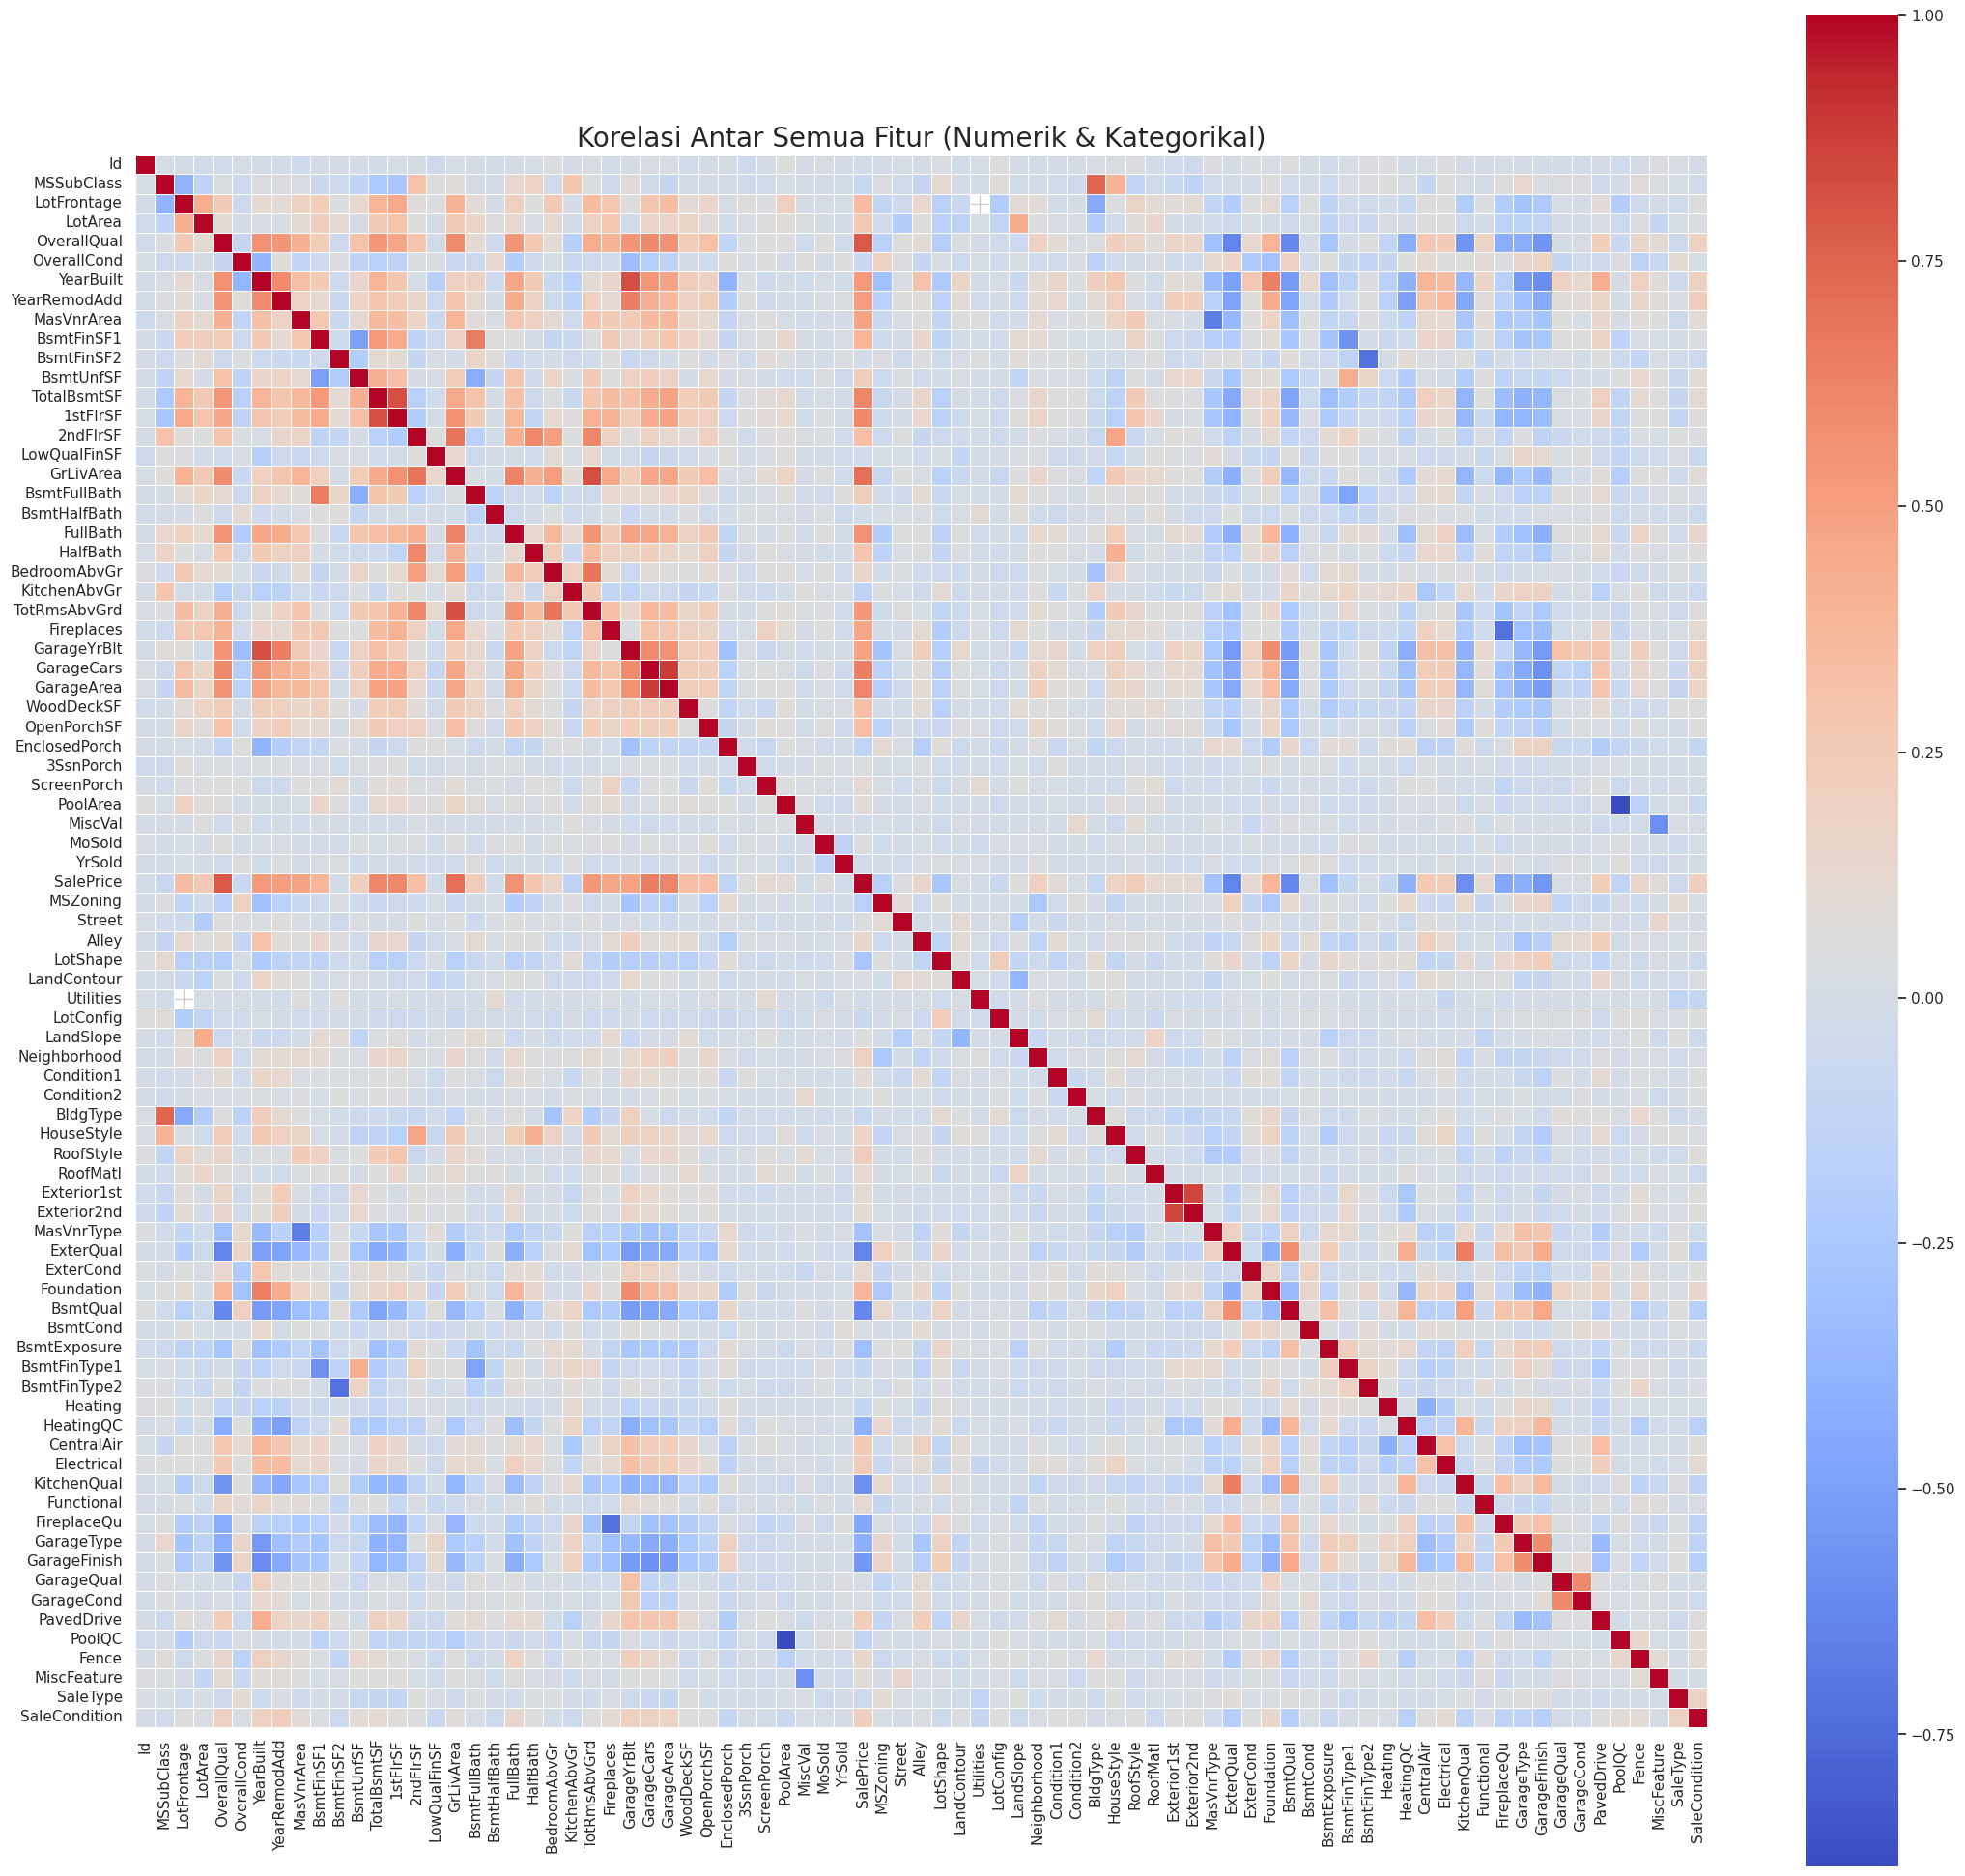

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur numerik dan kategorikal
numeric_feats = train.select_dtypes(include=['int64', 'float64'])
categorical_feats = train.select_dtypes(include=['object'])

# Label Encoding untuk fitur kategorikal agar bisa dihitung korelasinya
label_encoded = categorical_feats.copy()
le = LabelEncoder()
for col in label_encoded.columns:
    label_encoded[col] = le.fit_transform(label_encoded[col].astype(str))

# Gabungkan fitur numerik dan kategorikal yang sudah di-encode
combined_data = pd.concat([numeric_feats, label_encoded], axis=1)

# Hitung korelasi
corr_matrix = combined_data.corr()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(22, 20))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5,
    cbar=True,
    square=True,
    xticklabels=True,
    yticklabels=True
)
plt.title('Korelasi Antar Semua Fitur (Numerik & Kategorikal)', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

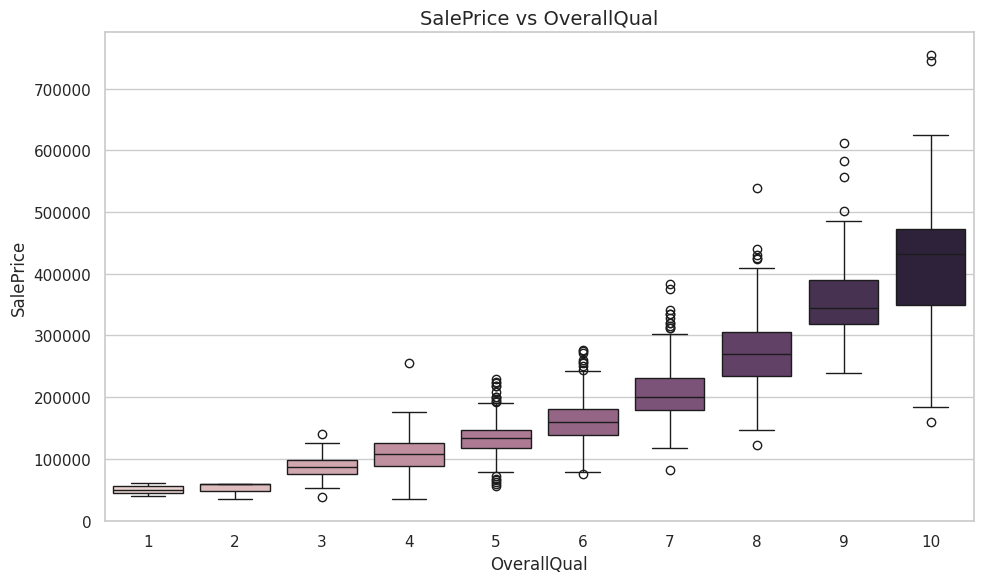

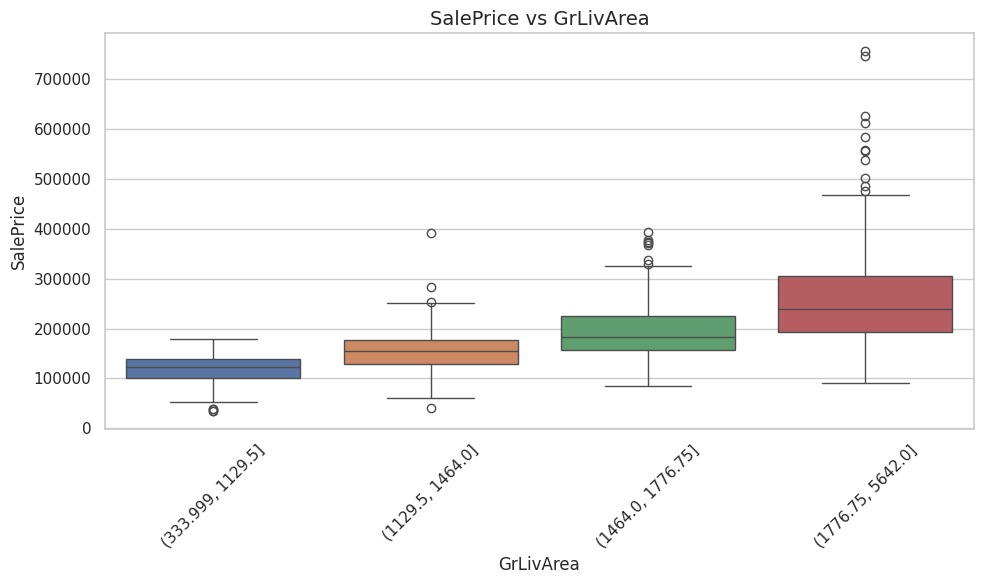

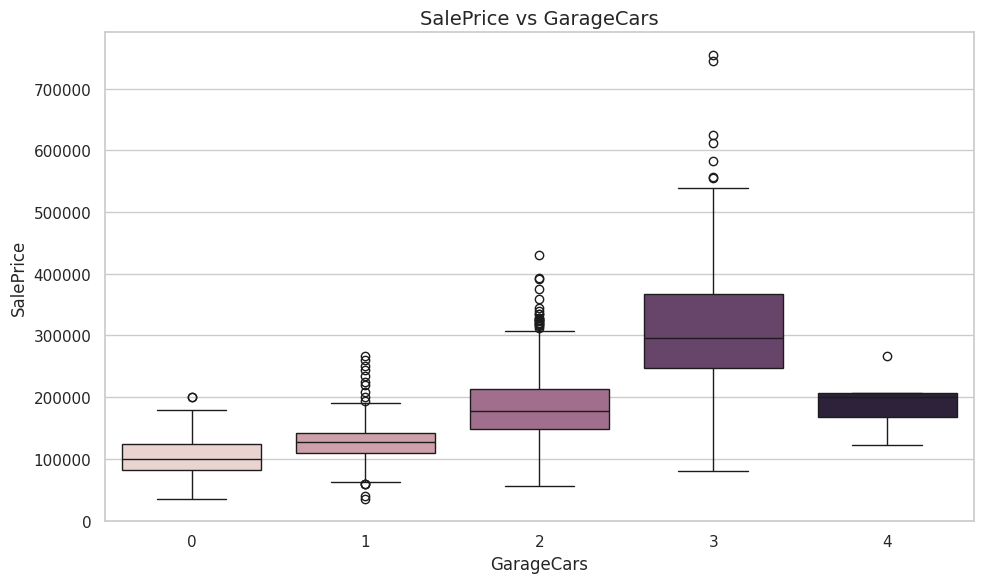

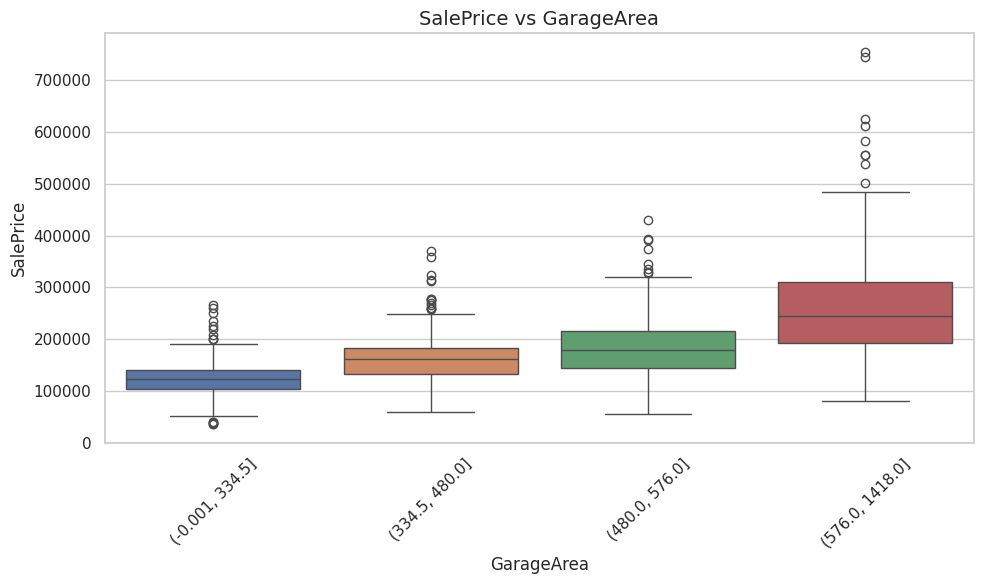

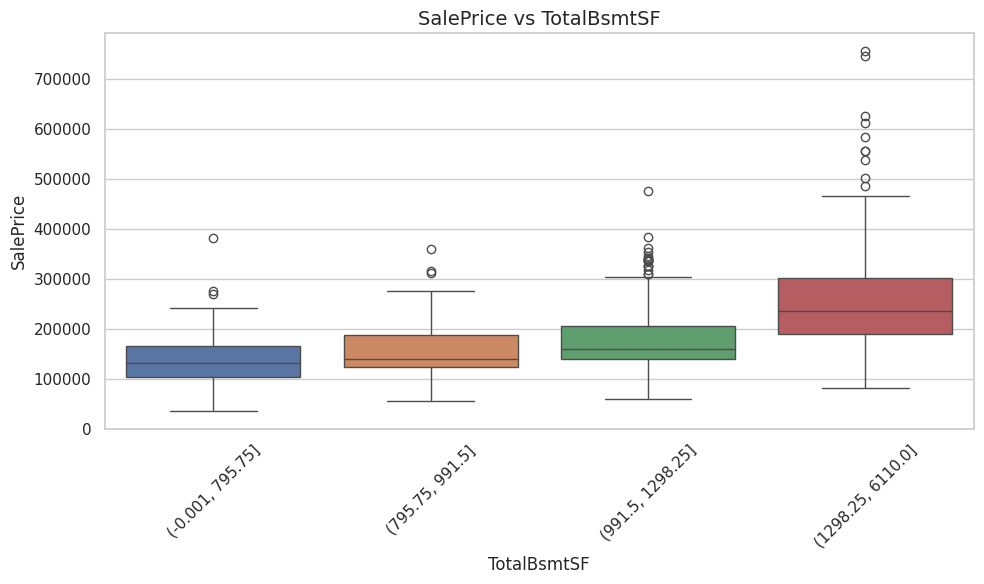

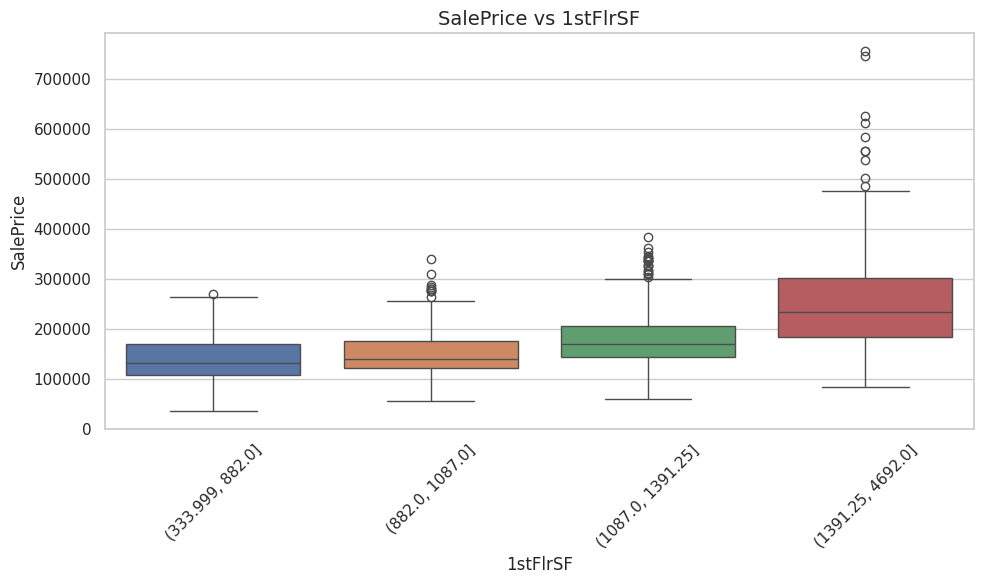

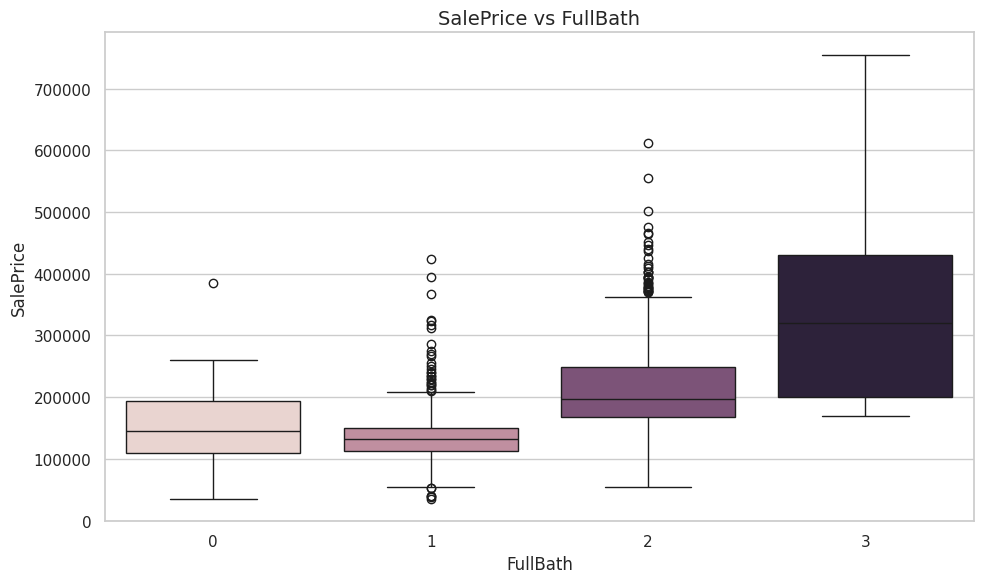

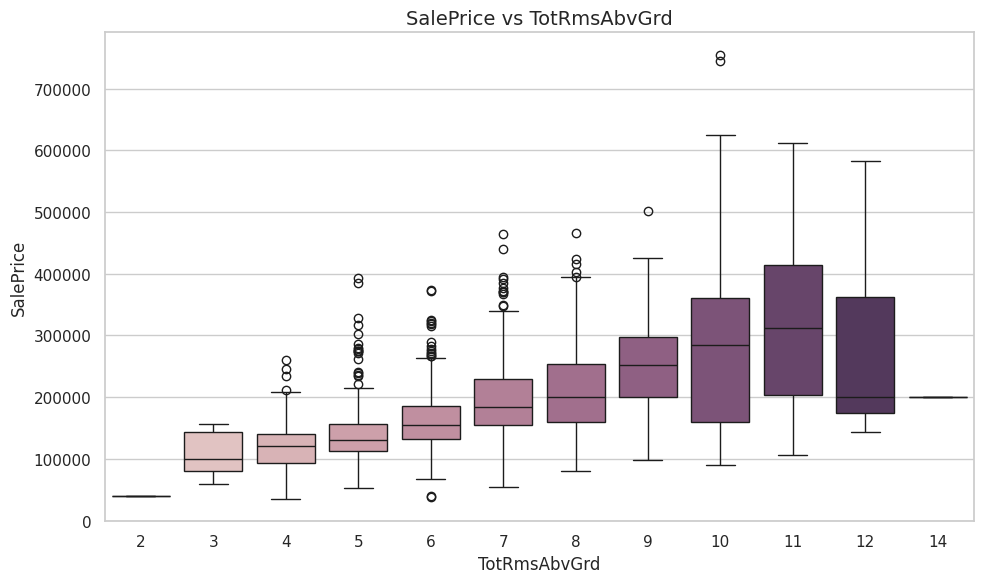

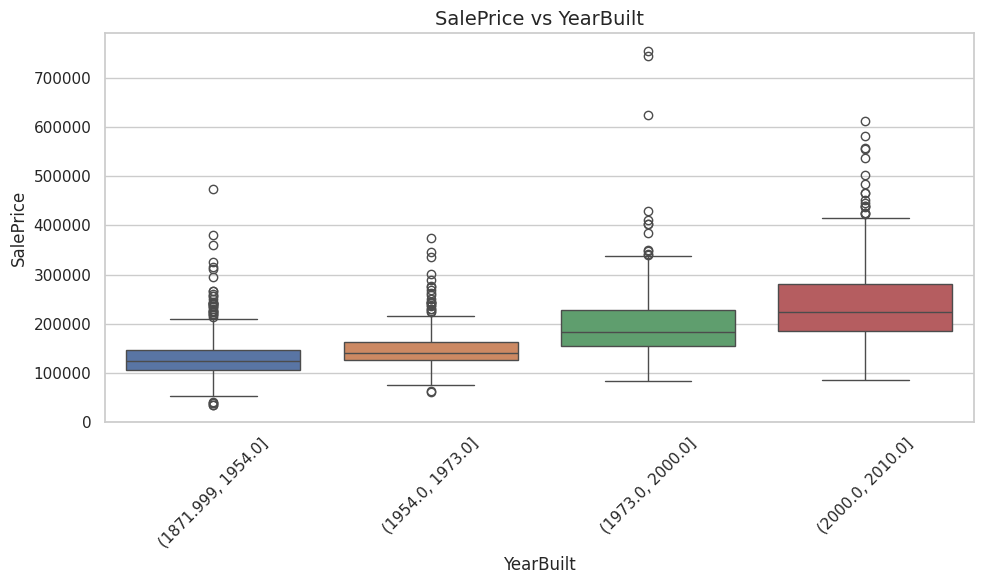

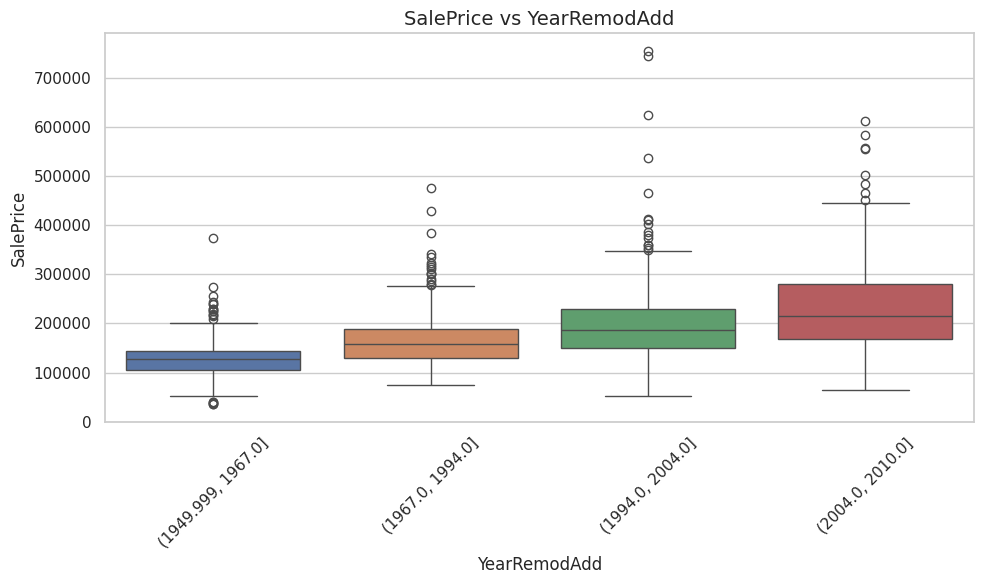

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
            'YearBuilt', 'YearRemodAdd']

for feature in features:
    plt.figure(figsize=(10, 6))

    if train[feature].nunique() < 20:
        sns.boxplot(x=train[feature], y=train['SalePrice'], hue=train[feature], legend=False)
    else:
        binned_feature = pd.qcut(train[feature], q=4, duplicates='drop')
        sns.boxplot(x=binned_feature, y=train['SalePrice'], hue=binned_feature, legend=False)
        plt.xticks(rotation=45)

    plt.title(f'SalePrice vs {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

# 2. Data Preprocessing

## Data Filtering

In [ ]:
# Pisahkan fitur dan target
X = train.drop(['Id', 'SalePrice'], axis=1)  # Hilangkan ID karena tidak berguna
y = train['SalePrice']

# Gabungkan data train dan test untuk preprocessing bersama
all_data = pd.concat([X, test.drop(['Id'], axis=1)], axis=0).reset_index(drop=True)

# Cek ukuran
print("Ukuran gabungan data sebelum preprocessing:", all_data.shape)

Ukuran gabungan data sebelum preprocessing: (2919, 79)


## Data Filtering

**Tujuan:**  
Memilih data yang relevan untuk dianalisis dan membuang fitur yang tidak memiliki kontribusi terhadap model.

**Langkah dan Interpretasi:**
- Kolom `Id` dihapus karena hanya merupakan identifikasi unik dan tidak memiliki pengaruh terhadap `SalePrice`.
- Kolom target `SalePrice` dipisahkan dari data fitur karena akan diprediksi, bukan digunakan sebagai input.
- Data `train` dan `test` digabung menjadi satu (`all_data`) agar proses preprocessing dilakukan seragam untuk seluruh data.

## Data Cleaning

In [ ]:
# Cek nilai yang hilang
missing = all_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("\nFitur dengan nilai kosong:")
display(missing)


Fitur dengan nilai kosong:


,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageYrBlt,159
GarageCond,159


## Data Cleaning

**Tujuan:**  
Mengidentifikasi nilai kosong (missing values) yang perlu ditangani agar tidak mengganggu pelatihan model.

**Langkah dan Interpretasi:**
- Menghitung jumlah nilai kosong di tiap fitur.
- Menyortir fitur yang memiliki nilai kosong terbanyak.
- Tahap ini hanya mendeteksi, belum menangani, dan menjadi acuan untuk tahap berikutnya (rekonstruksi).

## Data Construction

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur numerik dan kategorikal
numeric_features = all_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = all_data.select_dtypes(include=['object']).columns.tolist()

# Imputasi nilai kosong
# Numerik: Median
num_imputer = SimpleImputer(strategy='median')
all_data[numeric_features] = num_imputer.fit_transform(all_data[numeric_features])

# Kategorikal: Modus
cat_imputer = SimpleImputer(strategy='most_frequent')
all_data[categorical_features] = cat_imputer.fit_transform(all_data[categorical_features])

## Data Construction

**Tujuan:**  
Melakukan penanganan nilai kosong dan mentransformasikan data ke bentuk yang dapat diterima oleh algoritma machine learning.

**Langkah dan Interpretasi:**
- Fitur numerik: nilai kosong diisi dengan **median** agar tahan terhadap outlier.
- Fitur kategorikal: nilai kosong diisi dengan **modus** (nilai yang paling sering muncul).
- Dilakukan **one-hot encoding** untuk semua fitur kategorikal agar bisa diolah oleh model.
- Fitur numerik kemudian diskalakan menggunakan **StandardScaler** agar memiliki distribusi standar (mean=0, std=1).

## Data Labeling

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding untuk data kategorikal
all_data = pd.get_dummies(all_data, columns=categorical_features)

print("Ukuran data setelah one-hot encoding:", all_data.shape)

Ukuran data setelah one-hot encoding: (2919, 287)


## Data Labeling

**Tujuan:**  
Mengubah data kategorikal menjadi representasi numerik.

**Langkah dan Interpretasi:**
- One-hot encoding menghasilkan kolom baru biner (0 atau 1) untuk setiap kategori unik.
- Proses ini memang meningkatkan dimensi data, tetapi memberi representasi yang adil terhadap fitur kategorikal.

## Data Integration

In [ ]:
# Skalakan data numerik
scaler = StandardScaler()
all_data[numeric_features] = scaler.fit_transform(all_data[numeric_features])

# Pisahkan kembali data train dan test setelah preprocessing
X_processed = all_data.iloc[:len(X), :]
test_processed = all_data.iloc[len(X):, :]

print("\nUkuran data setelah preprocessing:")
print("X_processed:", X_processed.shape)
print("test_processed:", test_processed.shape)


Ukuran data setelah preprocessing:
X_processed: (1460, 287)
test_processed: (1459, 287)


## Data Integration

**Tujuan:**  
Memisahkan kembali data latih dan data uji dari dataset gabungan setelah preprocessing.

**Langkah dan Interpretasi:**
- Setelah semua fitur diproses (imputasi, encoding, scaling), data gabungan `all_data` dipecah kembali menjadi:
  - `X_processed`: data latih tanpa target.
  - `test_processed`: data uji yang telah siap untuk prediksi.
- Proses ini menjamin konsistensi preprocessing antara data latih dan data uji.